# Data Preparation and Exploratory Analysis of the Mushroom Dataset

This notebook presents data preparation and exploratory analysis of the Mushroom dataset from the UCI repository. The analysis focuses on the relationship between mushroom edibility, odor, and cap color to identify features relevant for predictive modeling.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ucimlrepo import fetch_ucirepo

# Fetch the dataset
mushroom = fetch_ucirepo(id=73)

X = mushroom.data.features
y = mushroom.data.targets

df = pd.concat([y, X], axis=1)
df.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Variable Selection and Encoding

The analysis will be looking at three variables: edibility, odor and, cap_color. All categorical values were encoded numerically for later analysis using scikit-learn.

In [28]:
# Create subset
df_subset = df[["poisonous", "odor", "cap-color"]].copy()

# Rename columns
df_subset.columns = ["edibility", "odor", "cap_color"]

# Changing values into numbers
edibility_map = {"e": 0, "p": 1}
odor_map = {v: i for i, v in enumerate(df_subset["odor"].unique())}
cap_color_map = {v: i for i, v in enumerate(df_subset["cap_color"].unique())}

df_subset["edibility"] = df_subset["edibility"].map(edibility_map)
df_subset["odor"] = df_subset["odor"].map(odor_map)
df_subset["cap_color"] = df_subset["cap_color"].map(cap_color_map)

df_subset.head()

,edibility,odor,cap_color
0,1,0,0
1,0,1,1
2,0,2,2
3,1,0,2
4,0,3,3


## Exploratory Data Analysis

The following scatterplots looks at the distributions of edibility, odor, and cap color, as well as their potential relationships to provide insight into which features may help predict whether a mushroom is edible or poisonous.

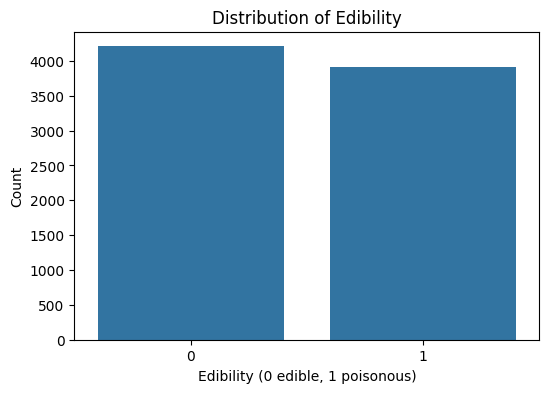

In [29]:
# Distribution of edibility
plt.figure(figsize=(6,4))
sns.countplot(x="edibility", data=df_subset)
plt.title("Distribution of Edibility")
plt.xlabel("Edibility (0 edible, 1 poisonous)")
plt.ylabel("Count")
plt.show()

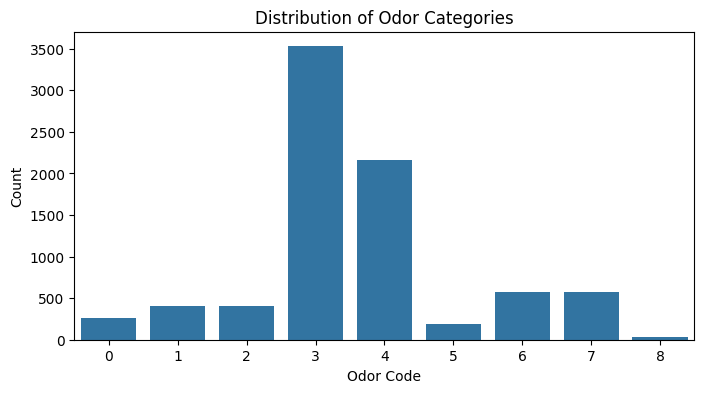

In [30]:
# Distribution of odor
plt.figure(figsize=(8,4))
sns.countplot(x="odor", data=df_subset)
plt.title("Distribution of Odor Categories")
plt.xlabel("Odor Code")
plt.ylabel("Count")
plt.show()

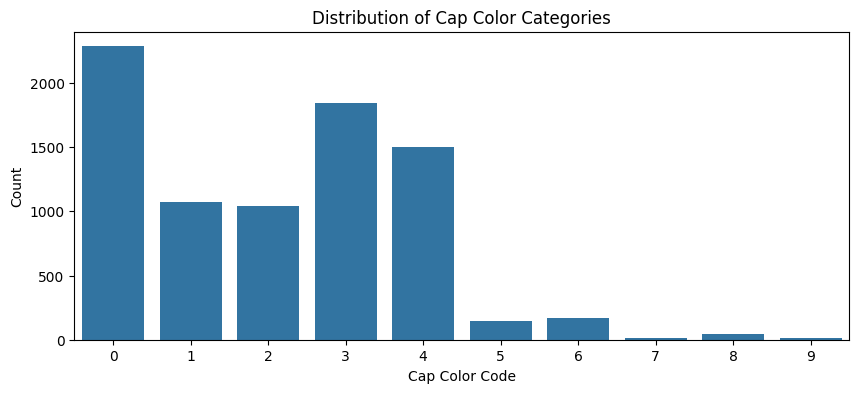

In [31]:
# Distribution of cap color
plt.figure(figsize=(10,4))
sns.countplot(x="cap_color", data=df_subset)
plt.title("Distribution of Cap Color Categories")
plt.xlabel("Cap Color Code")
plt.ylabel("Count")
plt.show()

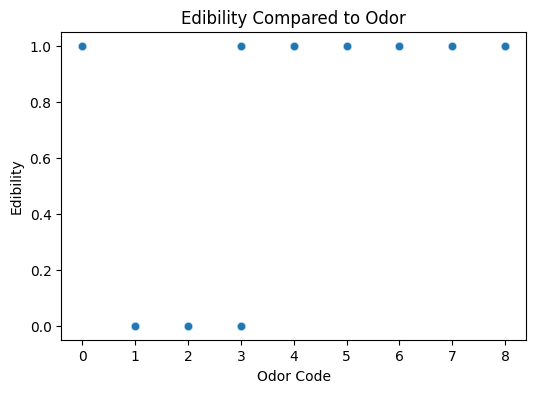

In [32]:
# Scatterplot of edibility vs odor
plt.figure(figsize=(6,4))
sns.scatterplot(x="odor", y="edibility", data=df_subset, alpha=0.5)
plt.title("Edibility Compared to Odor")
plt.xlabel("Odor Code")
plt.ylabel("Edibility")
plt.show()

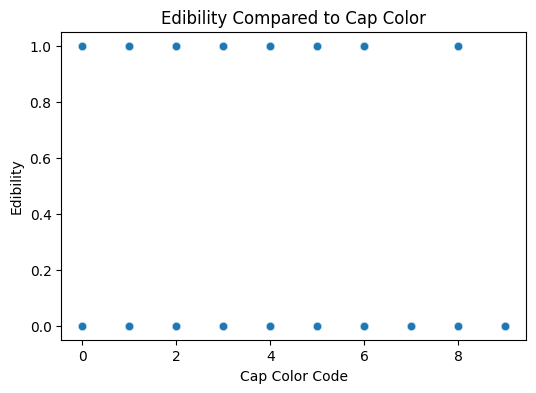

In [33]:
# Scatterplot of edibility vs cap color
plt.figure(figsize=(6,4))
sns.scatterplot(x="cap_color", y="edibility", data=df_subset, alpha=0.5)
plt.title("Edibility Compared to Cap Color")
plt.xlabel("Cap Color Code")
plt.ylabel("Edibility")
plt.show()

## Preliminary Observations

Odor seems to be strongly related to whether a mushroom is edible or poisonous. Certain odor categories almost always indicate poisonous mushrooms, while others indicate edible mushrooms. Cap color, on the other hand, is more mixed and doesn’t show a clear pattern. Based on this, I think odor will be the most useful feature for predicting edibility, while cap color might only help a little when combined with other features.